* https://pypi.org/project/yfinance/

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
msft = yf.Ticker("MSFT")

In [8]:
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 

In [9]:
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.07,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2019-11-25,150.00,151.35,149.92,151.23,22420900,0.0,0.0
2019-11-26,151.36,152.42,151.32,152.03,24620100,0.0,0.0
2019-11-27,152.33,152.50,151.52,152.32,15184400,0.0,0.0


In [10]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2018-11-14,0.46,0.0
2019-02-20,0.46,0.0
2019-05-15,0.46,0.0


In [11]:
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2018-11-14    0.46
2019-02-20    0.46
2019-05-15    0.46
2019-08-14    0.46
2019-11-20    0.51
Name: Dividends, Length: 64, dtype: float64

In [12]:
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [13]:
msft.financials

,2019-06-30,2018-06-30,2017-06-30,2016-06-30
Research Development,1.6876e+10,1.4726e+10,1.3037e+10,1.1988e+10
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,4.3688e+10,3.6474e+10,2.9901e+10,2.5639e+10
Minority Interest,None,None,None,None
Net Income,3.924e+10,1.6571e+10,2.5489e+10,2.0539e+10
Selling General Administrative,2.3098e+10,2.2223e+10,1.9942e+10,1.9198e+10
Gross Profit,8.2933e+10,7.2007e+10,6.231e+10,5.8374e+10
Ebit,4.2959e+10,3.5058e+10,2.9331e+10,2.7188e+10
Operating Income,4.2959e+10,3.5058e+10,2.9331e+10,2.7188e+10
Other Operating Expenses,None,None,None,None


In [14]:
msft.quarterly_financials

,2019-09-30,2019-06-30,2019-03-31,2018-12-31
Research Development,4.565e+09,4.513e+09,4.316e+09,4.07e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.2686e+10,1.2596e+10,1.0486e+10,1.0385e+10
Minority Interest,None,None,None,None
Net Income,1.0678e+10,1.3187e+10,8.809e+09,8.42e+09
Selling General Administrative,5.398e+09,6.387e+09,5.744e+09,5.72e+09
Gross Profit,2.2649e+10,2.3305e+10,2.0401e+10,2.0048e+10
Ebit,1.2686e+10,1.2405e+10,1.0341e+10,1.0258e+10
Operating Income,1.2686e+10,1.2405e+10,1.0341e+10,1.0258e+10
Other Operating Expenses,None,None,None,None


In [15]:
msft.balance_sheet

,2019-06-30,2018-06-30,2017-06-30,2016-06-30
Intangible Assets,7.750000e+09,8.053000e+09,1.010600e+10,3.733000e+09
Total Liab,1.842260e+11,1.761300e+11,1.626010e+11,1.214710e+11
Total Stockholder Equity,1.023300e+11,8.271800e+10,8.771100e+10,7.199700e+10
Other Current Liab,4.586000e+10,3.819500e+10,3.087900e+10,3.397200e+10
Total Assets,2.865560e+11,2.588480e+11,2.503120e+11,1.934680e+11
Common Stock,7.852000e+10,7.122300e+10,6.931500e+10,6.817800e+10
Other Current Assets,1.013300e+10,6.855000e+09,5.183000e+09,6.091000e+09
Retained Earnings,2.415000e+10,1.368200e+10,1.776900e+10,2.282000e+09
Other Liab,3.569900e+10,3.570700e+10,2.298600e+10,2.079600e+10
Good Will,4.202600e+10,3.568300e+10,3.512200e+10,1.787200e+10


In [16]:
msft.quarterly_balance_sheet

,2019-09-30,2019-06-30,2019-03-31,2018-12-31
Intangible Assets,7.508000e+09,7.750000e+09,8.103000e+09,8.482000e+09
Total Liab,1.728940e+11,1.842260e+11,1.684170e+11,1.667310e+11
Total Stockholder Equity,1.060610e+11,1.023300e+11,9.486400e+10,9.212800e+10
Other Current Liab,3.989600e+10,4.586000e+10,3.229500e+10,3.294900e+10
Total Assets,2.789550e+11,2.865560e+11,2.632810e+11,2.588590e+11
Common Stock,7.888200e+10,7.852000e+10,7.779100e+10,7.755600e+10
Other Current Assets,7.578000e+09,1.013300e+10,7.131000e+09,7.560000e+09
Retained Earnings,2.724000e+10,2.415000e+10,1.833800e+10,1.658500e+10
Other Liab,3.417800e+10,3.569900e+10,3.647100e+10,3.611200e+10
Good Will,4.211300e+10,4.202600e+10,4.186100e+10,4.157700e+10


In [2]:
data = yf.download('AAPL', '2019-01-01', '2019-12-02')

[*********************100%***********************]  1 of 1 completed


In [17]:
msft.cashflow

,2019-06-30,2018-06-30,2017-06-30,2016-06-30
Investments,5.400000e+08,6.557000e+09,-1.251100e+10,-1.441700e+10
Change To Liabilities,4.694000e+09,7.070000e+09,3.901000e+09,2.653000e+09
Total Cashflows From Investing Activities,-1.577300e+10,-6.061000e+09,-4.678100e+10,-2.395000e+10
Net Borrowings,-4.000000e+09,-1.020100e+10,3.145900e+10,1.828300e+10
Total Cash From Financing Activities,-3.688700e+10,-3.359000e+10,8.408000e+09,-8.393000e+09
Change To Operating Activities,-1.542000e+09,-4.590000e+08,3.490000e+08,-2.907000e+09
Issuance Of Stock,1.142000e+09,1.002000e+09,7.720000e+08,6.680000e+08
Net Income,3.924000e+10,1.657100e+10,2.548900e+10,2.053900e+10
Change In Cash,-5.900000e+08,4.283000e+09,1.153000e+09,9.150000e+08
Repurchase Of Stock,-1.954300e+10,-1.072100e+10,-1.178800e+10,-1.596900e+10


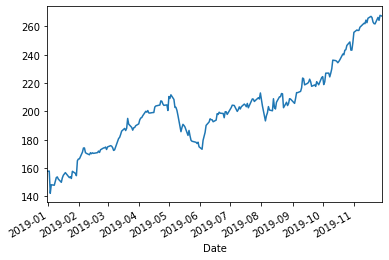

In [6]:
data.Close.plot()
plt.show()

In [18]:

msft.quarterly_cashflow

,2019-09-30,2019-06-30,2019-03-31,2018-12-31
Investments,2.071000e+09,-2.925000e+09,1.471000e+09,1.100000e+09
Change To Liabilities,-3.439000e+09,1.026900e+10,-1.770000e+08,-2.562000e+09
Total Cashflows From Investing Activities,-1.776000e+09,-7.257000e+09,-1.363000e+09,-4.200000e+09
Net Borrowings,-2.500000e+09,-1.000000e+09,-1.000000e+09,-3.000000e+09
Total Cash From Financing Activities,-1.020900e+10,-8.686000e+09,-7.601000e+09,-1.321600e+10
Change To Operating Activities,-3.681000e+09,9.580000e+08,4.570000e+08,-2.200000e+07
Issuance Of Stock,4.270000e+08,3.080000e+08,2.740000e+08,2.000000e+08
Net Income,1.067800e+10,1.318700e+10,8.809000e+09,8.420000e+09
Change In Cash,1.761000e+09,1.440000e+08,4.574000e+09,-8.499000e+09
Repurchase Of Stock,-4.912000e+09,-4.633000e+09,-4.753000e+09,-6.413000e+09


In [19]:
msft.earnings

,Revenue,Earnings
Year,,
2016,91154000000,20539000000
2017,96571000000,25489000000
2018,110360000000,16571000000
2019,125843000000,39240000000


In [20]:

msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
4Q2018,32471000000,8420000000
1Q2019,30571000000,8809000000
2Q2019,33717000000,13187000000
3Q2019,33055000000,10678000000


In [21]:

msft.sustainability

,Value
2019-11,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,70.81
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [22]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-07-20,Goldman Sachs,Neutral,,main
2012-07-20,Griffin Securities,Buy,,init
2012-08-20,Longbow Research,Buy,,init
2012-09-12,Jefferies,Hold,,init
2012-10-01,RBC Capital,Sector Perform,,down
...,...,...,...,...
2019-10-24,Barclays,Overweight,,main
2019-10-24,Stifel,Buy,,main
2019-10-24,Citi,Neutral,,main


In [23]:
msft.calendar

,0,1
Earnings Date,2020-01-28 00:00:00,2020-02-03 00:00:00
Earnings Average,1.32,1.32
Earnings Low,1.27,1.27
Earnings High,1.37,1.37
Revenue Average,35700900000,35700900000
Revenue Low,35346900000,35346900000
Revenue High,36145000000,36145000000


In [24]:
msft.options

('2019-12-06',
 '2019-12-13',
 '2019-12-20',
 '2019-12-27',
 '2020-01-03',
 '2020-01-10',
 '2020-01-17',
 '2020-02-21',
 '2020-03-20',
 '2020-04-17',
 '2020-05-15',
 '2020-06-19',
 '2020-07-17',
 '2020-09-18',
 '2021-01-15',
 '2021-03-19',
 '2021-06-18',
 '2022-01-21')

In [26]:
opt = msft.option_chain('2020-07-17')
# data available via: opt.calls, opt.puts

In [27]:
opt

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   MSFT200717C00100000 2019-12-02 05:08:26   100.0      52.85  48.60  52.80   
1   MSFT200717C00110000 2019-11-19 19:26:35   110.0      40.80  39.70  43.35   
2   MSFT200717C00115000 2019-11-22 15:45:28   115.0      36.50  34.90  38.85   
3   MSFT200717C00120000 2019-11-19 18:22:50   120.0      32.70  30.85  34.35   
4   MSFT200717C00130000 2019-12-02 14:47:23   130.0      24.65  22.95  25.10   
5   MSFT200717C00140000 2019-11-27 20:59:35   140.0      18.50  15.70  18.05   
6   MSFT200717C00145000 2019-12-02 20:48:51   145.0      13.70  12.55  14.55   
7   MSFT200717C00150000 2019-12-02 17:16:55   150.0      10.55  10.20  11.20   
8   MSFT200717C00155000 2019-12-02 20:41:35   155.0       8.46   8.35   9.40   
9   MSFT200717C00160000 2019-12-02 17:16:55   160.0       6.45   6.25   6.55   
10  MSFT200717C00165000 2019-12-02 20:23:29   165.0       4.65   4.50   4.90   
11  MSFT200717C00175000 20

In [29]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [32]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
- SPY: 1m data not available for startTime=1546377377 and endTime=1575321377. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- AAPL: 1m data not available for startTime=1546377377 and endTime=1575321377. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- MSFT: 1m data not available for startTime=1546377377 and endTime=1575321377. Only 7 days worth of 1m granularity data are allowed to be fetched per request.


In [33]:
data

Empty DataFrame
Columns: [(SPY, Open), (SPY, High), (SPY, Low), (SPY, Close), (SPY, Adj Close), (SPY, Volume), (AAPL, Open), (AAPL, High), (AAPL, Low), (AAPL, Close), (AAPL, Adj Close), (AAPL, Volume), (MSFT, Open), (MSFT, High), (MSFT, Low), (MSFT, Close), (MSFT, Adj Close), (MSFT, Volume)]
Index: []

In [34]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,213.842758,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,215.114944,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,214.944016,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,215.713058,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,215.001022,46939700
...,...,...,...,...,...,...
2017-04-24,237.179993,237.410004,234.559998,237.169998,226.148666,119209900
2017-04-25,237.910004,238.949997,237.809998,238.550003,227.464539,76698300
2017-04-26,238.509995,239.529999,238.350006,238.399994,227.321518,84702500
